**Problem Statement**

- to determine the predictor variables that influence users to use shared bikes

**Data Dictionary**
  - **instant**: record index
  - **dteday** : date
  - **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
  - **yr** : year (0: 2018, 1:2019)
  - **mnth** : month ( 1 to 12)
  - **holiday** : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  - **weekday** : day of the week
  - **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
  + **weathersit** : 
      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - **temp** : temperature in Celsius
  - **atemp**: feeling temperature in Celsius
  - **hum**: humidity
  - **windspeed**: wind speed
  - **casual**: count of casual users
  - **registered**: count of registered users
  - **cnt**: count of total rental bikes including both casual and registered

### Data Preparation

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting the max column settings for pandas
pd.set_option('display.max_columns', 25)

#Setting plt style
plt.style.use('fivethirtyeight')
%matplotlib inline

#Setting seaborn background style
sns.set()

#### Importing the data

In [4]:
rental = pd.read_csv('day.csv', parse_dates = ['dteday'], dayfirst =True, index_col = ['instant'])
rental.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                              
1       2018-01-01       1   0     1        0        1           1   
2       2018-01-02       1   0     1        0        2           1   
3       2018-01-03       1   0     1        0        3           1   
4       2018-01-04       1   0     1        0        4           1   
5       2018-01-05       1   0     1        0        5           1   

         weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                
1                 2  14.110847  18.18125  80.5833  10.749882     331   
2                 2  14.902598  17.68695  69.6087  16.652113     131   
3                 1   8.050924   9.47025  43.7273  16.636703     120   
4                 1   8.200000  10.60610  59.0435  10.739832     108   
5                 1   9.305237  11.46350  43.6957  12.522300      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

##### Shape of the data - 730 x 15

In [5]:
rental.shape

(730, 15)

##### Info
    - No missing values    

In [6]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.2 KB


##### Describe
   - `Numerical Continous Variables` - ['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
   - `Categorical` - ['weathersit', 'season', 'yr', 'holiday', 'weekday', 'workingday']
   - No negative values in data, so no data error

In [7]:
rental.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.995890    0.690411   
std      1.110184    0.500343    3.450215    0.167266    2.000339    0.462641   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

#### Inspecting data

##### cnt column
  - There is no data error in `cnt`  

In [8]:
rental['difference'] = rental['casual'] + rental['registered'] - rental['cnt']
rental['difference'].value_counts()

0    730
Name: difference, dtype: int64

In [9]:
rental.drop(['difference'], axis =1, inplace = True)
rental.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                              
1       2018-01-01       1   0     1        0        1           1   
2       2018-01-02       1   0     1        0        2           1   
3       2018-01-03       1   0     1        0        3           1   
4       2018-01-04       1   0     1        0        4           1   
5       2018-01-05       1   0     1        0        5           1   

         weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                
1                 2  14.110847  18.18125  80.5833  10.749882     331   
2                 2  14.902598  17.68695  69.6087  16.652113     131   
3                 1   8.050924   9.47025  43.7273  16.636703     120   
4                 1   8.200000  10.60610  59.0435  10.739832     108   
5                 1   9.305237  11.46350  43.6957  12.522300      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

#### Imputing data

##### season
    1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'

In [10]:
rental['season'] = rental['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
rental.head()

dteday  season  yr  mnth  holiday  weekday  workingday  \
instant                                                              
1       2018-01-01  spring   0     1        0        1           1   
2       2018-01-02  spring   0     1        0        2           1   
3       2018-01-03  spring   0     1        0        3           1   
4       2018-01-04  spring   0     1        0        4           1   
5       2018-01-05  spring   0     1        0        5           1   

         weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                
1                 2  14.110847  18.18125  80.5833  10.749882     331   
2                 2  14.902598  17.68695  69.6087  16.652113     131   
3                 1   8.050924   9.47025  43.7273  16.636703     120   
4                 1   8.200000  10.60610  59.0435  10.739832     108   
5                 1   9.305237  11.46350  43.6957  12.522300      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

##### mnth
    1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 
    6 : 'Jun', 7 : 'Jul',8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 
    11 : 'Nov', 12 : 'Dec'

In [11]:
rental['mnth'] = rental['mnth'].map({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul',
                                    8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})
rental.head()

dteday  season  yr mnth  holiday  weekday  workingday  weathersit  \
instant                                                                         
1       2018-01-01  spring   0  Jan        0        1           1           2   
2       2018-01-02  spring   0  Jan        0        2           1           2   
3       2018-01-03  spring   0  Jan        0        3           1           1   
4       2018-01-04  spring   0  Jan        0        4           1           1   
5       2018-01-05  spring   0  Jan        0        5           1           1   

              temp     atemp      hum  windspeed  casual  registered   cnt  
instant                                                                     
1        14.110847  18.18125  80.5833  10.749882     331         654   985  
2        14.902598  17.68695  69.6087  16.652113     131         670   801  
3         8.050924   9.47025  43.7273  16.636703     120        1229  1349  
4         8.200000  10.60610  59.0435  10.739832     108        1454  1562  
5         9.305237  11.46350  43.6957  12.522300      82        1518  1600

##### weathersit
    1 : 'Clear-Partly cloudy', 2 : 'Mist-Cloudy ', 3 : 'Light Rain-Light Snow', 4 : 'Heavy Rain-Fog'

In [12]:
rental['weathersit'] = rental['weathersit'].map({1 : 'Clear-Partly cloudy', 2 : 'Mist-Cloudy ', 3 : 'Light Rain-Light Snow', 
                                                 4 : 'Heavy Rain-Fog'})
rental.head()

dteday  season  yr mnth  holiday  weekday  workingday  \
instant                                                             
1       2018-01-01  spring   0  Jan        0        1           1   
2       2018-01-02  spring   0  Jan        0        2           1   
3       2018-01-03  spring   0  Jan        0        3           1   
4       2018-01-04  spring   0  Jan        0        4           1   
5       2018-01-05  spring   0  Jan        0        5           1   

                  weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                         
1               Mist-Cloudy   14.110847  18.18125  80.5833  10.749882     331   
2               Mist-Cloudy   14.902598  17.68695  69.6087  16.652113     131   
3        Clear-Partly cloudy   8.050924   9.47025  43.7273  16.636703     120   
4        Clear-Partly cloudy   8.200000  10.60610  59.0435  10.739832     108   
5        Clear-Partly cloudy   9.305237  11.46350  43.6957  12.522300      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

In [13]:
rental.head(10)

dteday  season  yr mnth  holiday  weekday  workingday  \
instant                                                             
1       2018-01-01  spring   0  Jan        0        1           1   
2       2018-01-02  spring   0  Jan        0        2           1   
3       2018-01-03  spring   0  Jan        0        3           1   
4       2018-01-04  spring   0  Jan        0        4           1   
5       2018-01-05  spring   0  Jan        0        5           1   
6       2018-01-06  spring   0  Jan        0        6           0   
7       2018-01-07  spring   0  Jan        0        0           0   
8       2018-01-08  spring   0  Jan        0        1           1   
9       2018-01-09  spring   0  Jan        0        2           1   
10      2018-01-10  spring   0  Jan        0        3           1   

                  weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                         
1               Mist-Cloudy   14.110847  18.18125  80.5833  10.749882     331   
2               Mist-Cloudy   14.902598  17.68695  69.6087  16.652113     131   
3        Clear-Partly cloudy   8.050924   9.47025  43.7273  16.636703     120   
4        Clear-Partly cloudy   8.200000  10.60610  59.0435  10.739832     108   
5        Clear-Partly cloudy   9.305237  11.46350  43.6957  12.522300      82   
6        Clear-Partly cloudy   8.378268  11.66045  51.8261   6.000868      88   
7               Mist-Cloudy    8.057402  10.44195  49.8696  11.304642     148   
8               Mist-Cloudy    6.765000   8.11270  53.5833  17.875868      68   
9        Clear-Partly cloudy   5.671653   5.80875  43.4167  24.250650      54   
10       Clear-Partly cloudy   6.184153   7.54440  48.2917  14.958889      41   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600  
6              1518  1606  
7              1362  1510  
8               891   959  
9               768   822  
10             1280  1321

##### weekday
    0 : 'Sunday', 1 : 'Monday ', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'

In [14]:
rental['weekday'] = rental['weekday'].map({0 : 'Sunday', 1 : 'Monday ', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 
                                           5 : 'Friday', 6 : 'Saturday'})
rental.head()

dteday  season  yr mnth  holiday    weekday  workingday  \
instant                                                               
1       2018-01-01  spring   0  Jan        0    Monday            1   
2       2018-01-02  spring   0  Jan        0    Tuesday           1   
3       2018-01-03  spring   0  Jan        0  Wednesday           1   
4       2018-01-04  spring   0  Jan        0   Thursday           1   
5       2018-01-05  spring   0  Jan        0     Friday           1   

                  weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                         
1               Mist-Cloudy   14.110847  18.18125  80.5833  10.749882     331   
2               Mist-Cloudy   14.902598  17.68695  69.6087  16.652113     131   
3        Clear-Partly cloudy   8.050924   9.47025  43.7273  16.636703     120   
4        Clear-Partly cloudy   8.200000  10.60610  59.0435  10.739832     108   
5        Clear-Partly cloudy   9.305237  11.46350  43.6957  12.522300      82   

         registered   cnt  
instant                    
1               654   985  
2               670   801  
3              1229  1349  
4              1454  1562  
5              1518  1600

##### Adding a column 'weekend' 
   - 'Saturday', 'Sunday' `1` other days `0`

In [15]:
rental['weekend'] = rental['weekday'].apply(lambda x : 1 if (x == 'Saturday' or x == 'Sunday') else 0)
rental.head(15)

dteday  season  yr mnth  holiday    weekday  workingday  \
instant                                                               
1       2018-01-01  spring   0  Jan        0    Monday            1   
2       2018-01-02  spring   0  Jan        0    Tuesday           1   
3       2018-01-03  spring   0  Jan        0  Wednesday           1   
4       2018-01-04  spring   0  Jan        0   Thursday           1   
5       2018-01-05  spring   0  Jan        0     Friday           1   
6       2018-01-06  spring   0  Jan        0   Saturday           0   
7       2018-01-07  spring   0  Jan        0     Sunday           0   
8       2018-01-08  spring   0  Jan        0    Monday            1   
9       2018-01-09  spring   0  Jan        0    Tuesday           1   
10      2018-01-10  spring   0  Jan        0  Wednesday           1   
11      2018-01-11  spring   0  Jan        0   Thursday           1   
12      2018-01-12  spring   0  Jan        0     Friday           1   
13      2018-01-13  spring   0  Jan        0   Saturday           0   
14      2018-01-14  spring   0  Jan        0     Sunday           0   
15      2018-01-15  spring   0  Jan        0    Monday            1   

                  weathersit       temp     atemp      hum  windspeed  casual  \
instant                                                                         
1               Mist-Cloudy   14.110847  18.18125  80.5833  10.749882     331   
2               Mist-Cloudy   14.902598  17.68695  69.6087  16.652113     131   
3        Clear-Partly cloudy   8.050924   9.47025  43.7273  16.636703     120   
4        Clear-Partly cloudy   8.200000  10.60610  59.0435  10.739832     108   
5        Clear-Partly cloudy   9.305237  11.46350  43.6957  12.522300      82   
6        Clear-Partly cloudy   8.378268  11.66045  51.8261   6.000868      88   
7               Mist-Cloudy    8.057402  10.44195  49.8696  11.304642     148   
8               Mist-Cloudy    6.765000   8.11270  53.5833  17.875868      68   
9        Clear-Partly cloudy   5.671653   5.80875  43.4167  24.250650      54   
10       Clear-Partly cloudy   6.184153   7.54440  48.2917  14.958889      41   
11              Mist-Cloudy    6.932731   9.57320  68.6364   8.182844      43   
12       Clear-Partly cloudy   7.081807   8.02365  59.9545  20.410009      25   
13       Clear-Partly cloudy   6.765000   7.54415  47.0417  20.167000      38   
14       Clear-Partly cloudy   6.595670   9.42065  53.7826   8.478716      54   
15              Mist-Cloudy    9.566653  12.40560  49.8750  10.583521     222   

         registered   cnt  weekend  
instant                             
1               654   985        0  
2               670   801        0  
3              1229  1349        0  
4              1454  1562        0  
5              1518  1600        0  
6              1518  1606        1  
7              1362  1510        1  
8               891   959        0  
9               768   822        0  
10             1280  1321        0  
11             1220  1263        0  
12             1137  1162        0  
13             1368  1406        1  
14             1367  1421        1  
15             1026  1248        0

### Data Visualization

#### Pairplot
   - Temperature is playing significant positive role
   - Windspeed is playing considerable negative role
   - There is increase in number of registered drive than casual drive in 2019

<Figure size 1728x1728 with 0 Axes>

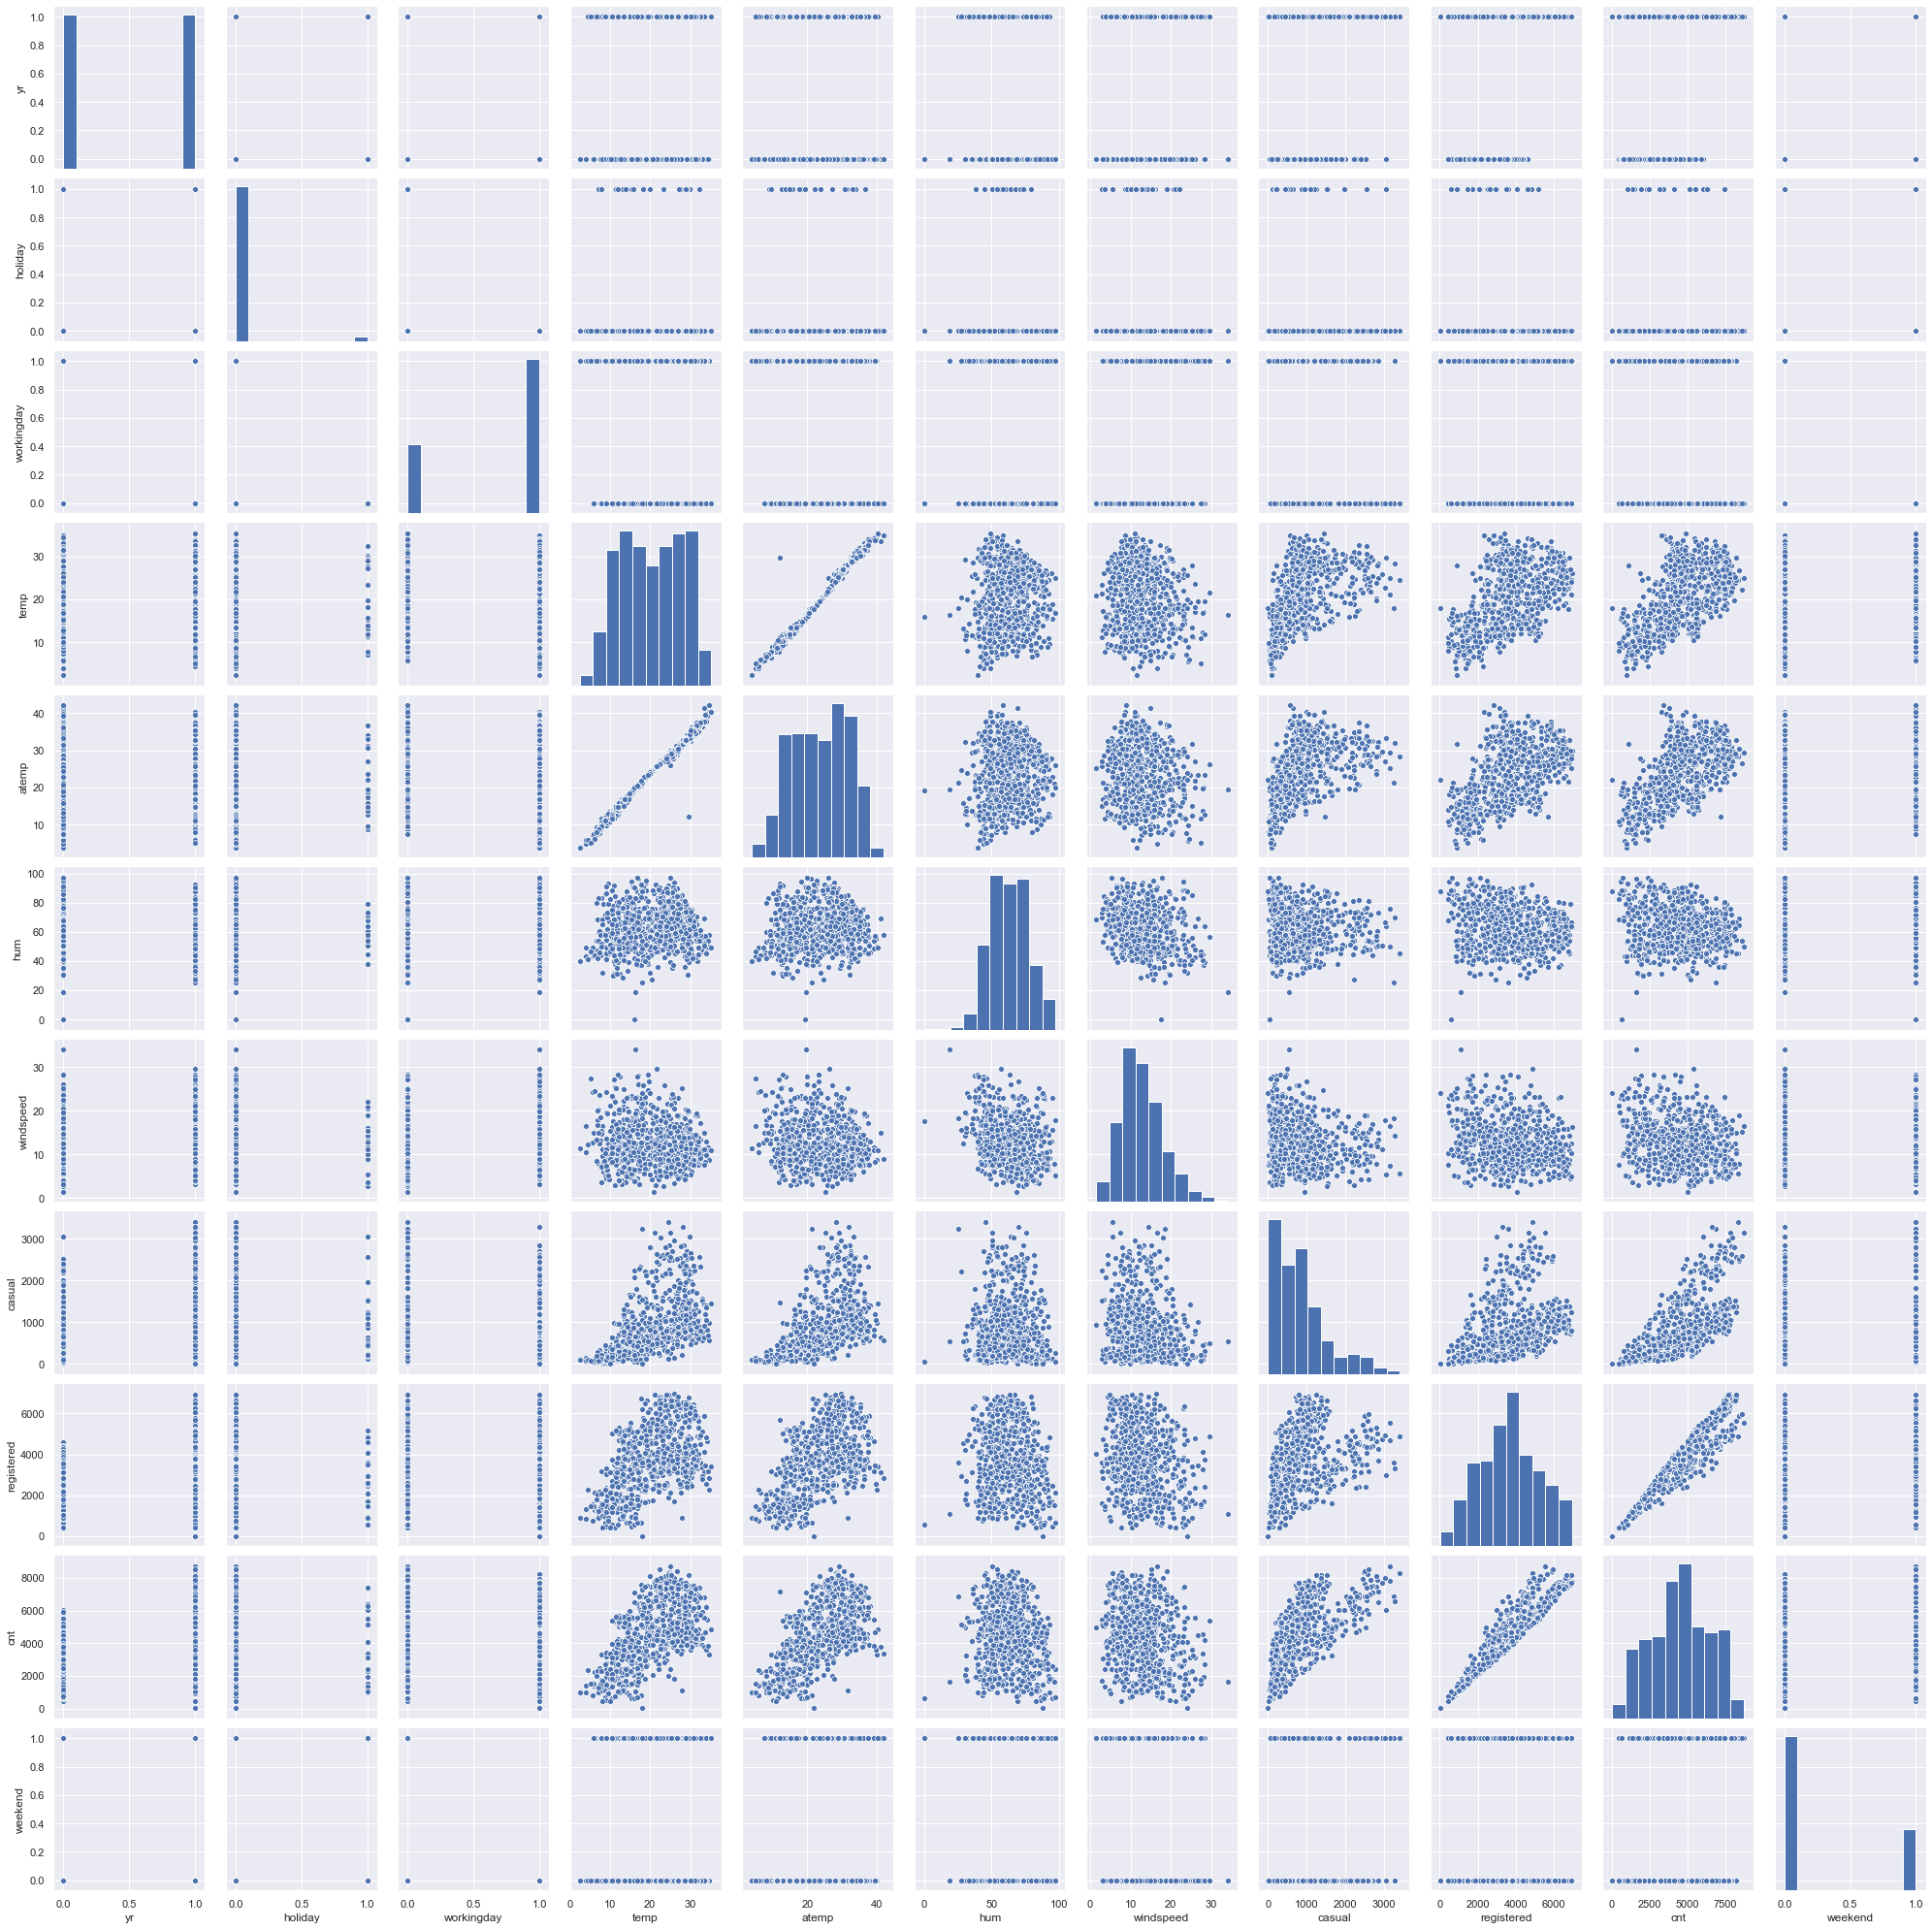

In [16]:
plt.figure(figsize=(24,24))
sns.pairplot(rental)
plt.show()

#### Correlation Matrix
   - Temperature is playing significant positive role
   - Windspeed is playing considerable negative role
   - There is increase in number of registered drive than casual drive in 2019

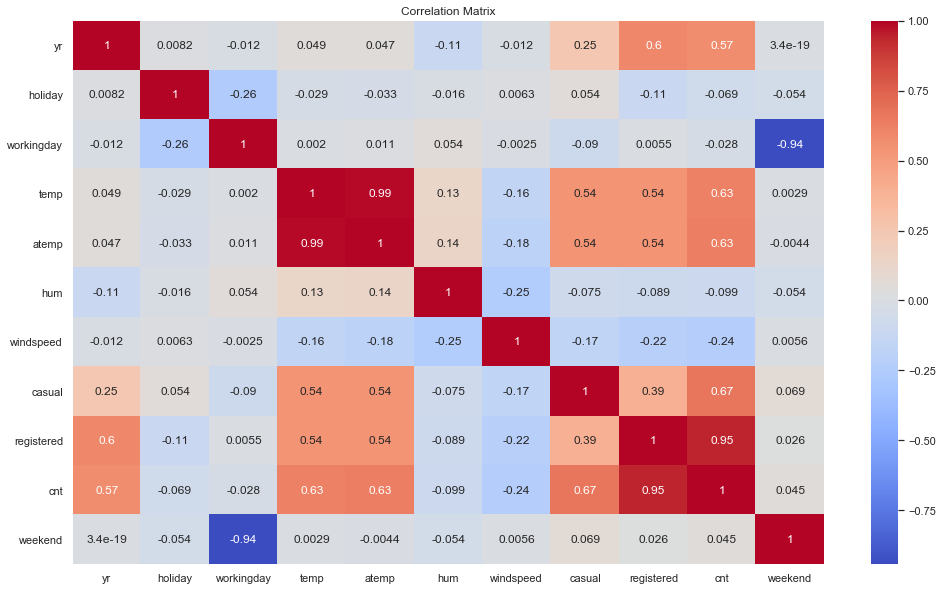

In [17]:
plt.figure(figsize = (15, 10))
sns.heatmap(rental.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Time Series Analysis on `cnt`, `casual` and `registered`
   - `Registered Rental users` contributes significantly on the daily usuage  

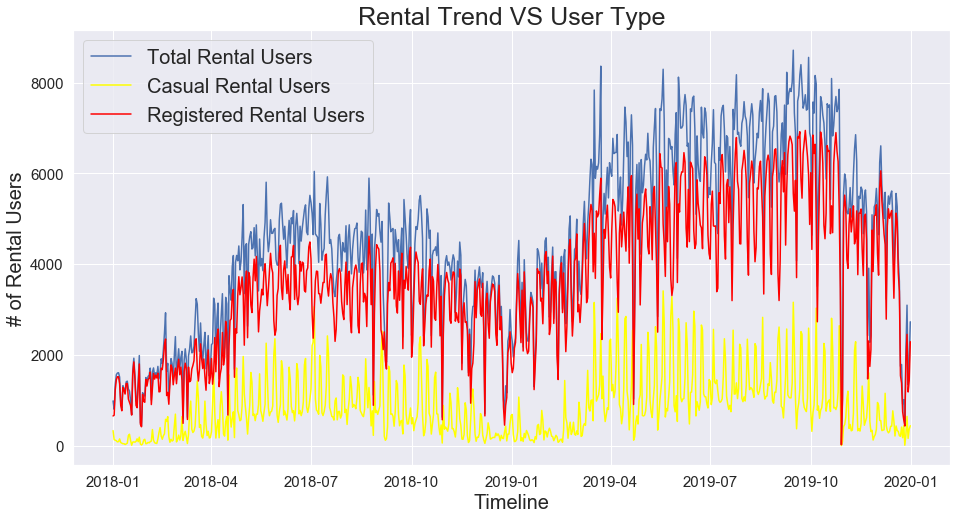

In [18]:
plt.figure(figsize = (14, 8))
plt.plot(rental['dteday'], rental['cnt'])
plt.plot(rental['dteday'], rental['casual'], linestyle='solid', color='yellow')
plt.plot(rental['dteday'], rental['registered'], linestyle='solid', color='red')
plt.title('Rental Trend VS User Type', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Total Rental Users', 'Casual Rental Users', 'Registered Rental Users'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

#### Time Series Analysis with `temp`, `atemp`, `humidity` and `windspeed`
   - Significant relationship with `temperature`

In [19]:
temp_series = pd.Series(rental['temp'])
temp_series = temp_series.apply(lambda x: x*100)

In [20]:
atemp_series = pd.Series(rental['atemp'])
atemp_series = atemp_series.apply(lambda x: x*100)

In [21]:
hum_series = pd.Series(rental['hum'])
hum_series = hum_series.apply(lambda x: x*50)

In [22]:
windspeed_series = pd.Series(rental['windspeed'])
windspeed_series = windspeed_series.apply(lambda x: x*100)

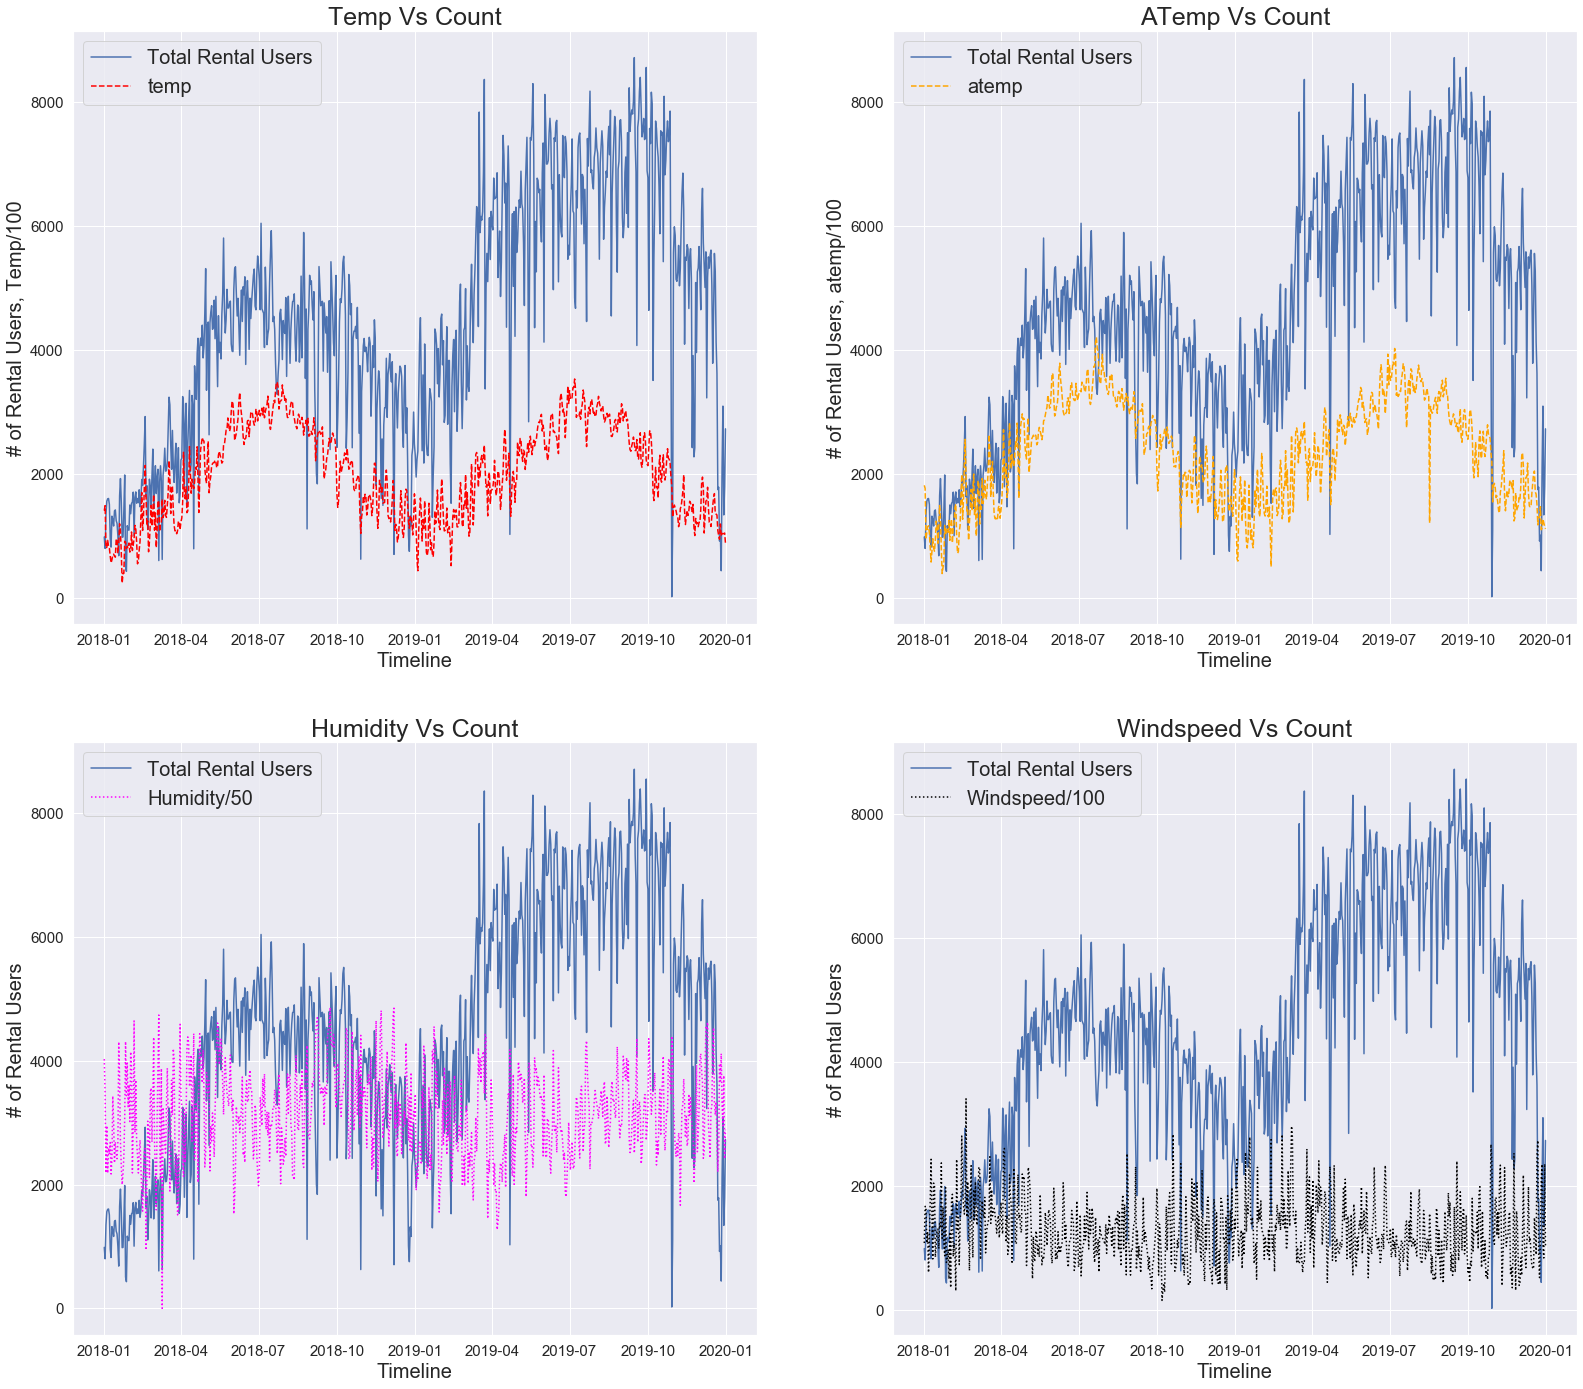

In [23]:
plt.figure(figsize = (24, 24))

plt.subplot(2,2,1)
plt.plot(rental['dteday'], rental['cnt'])
plt.plot(rental['dteday'], temp_series, linestyle = 'dashed', color = 'red')
plt.title('Temp Vs Count', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users, Temp/100', size=20)
plt.legend(['Total Rental Users', 'temp'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(2,2,2)
plt.plot(rental['dteday'], rental['cnt'])
plt.plot(rental['dteday'], atemp_series, linestyle = 'dashed', color = 'orange')
plt.title('ATemp Vs Count', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users, atemp/100', size=20)
plt.legend(['Total Rental Users', 'atemp'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(2,2,3)
plt.plot(rental['dteday'], rental['cnt'])
plt.plot(rental['dteday'], hum_series, linestyle = 'dotted', color = 'magenta')
plt.title('Humidity Vs Count', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Total Rental Users', 'Humidity/50'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(2,2,4)
plt.plot(rental['dteday'], rental['cnt'])
plt.plot(rental['dteday'], windspeed_series, linestyle = 'dotted', color = 'black')
plt.title('Windspeed Vs Count', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Total Rental Users', 'Windspeed/100'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

#### Time Series Analysis with `Season` and `Weather`
   - Significant negative relationship with `Rain/Snow and Fog`
   - Significant positive relationship with `Clear Cloud`
   - Significant positive relationship with `Summer`
   - Significant negative relationship with `Winter`
   - Cnt tends to rise when continous days have clear weather post rain

In [24]:
season_series = pd.Series(rental['season'])
season_series = season_series.map({'spring' : 2000, 'summer': 4000, 'fall' : 6000, 'winter' : 4000})

In [25]:
weather_series = pd.Series(rental['weathersit'])
weather_series = weather_series.map({'Clear-Partly cloudy' : 1500 , 'Mist-Cloudy ' : 750 , 'Light Rain-Light Snow' : 200 ,'Heavy Rain-Fog' : 0})

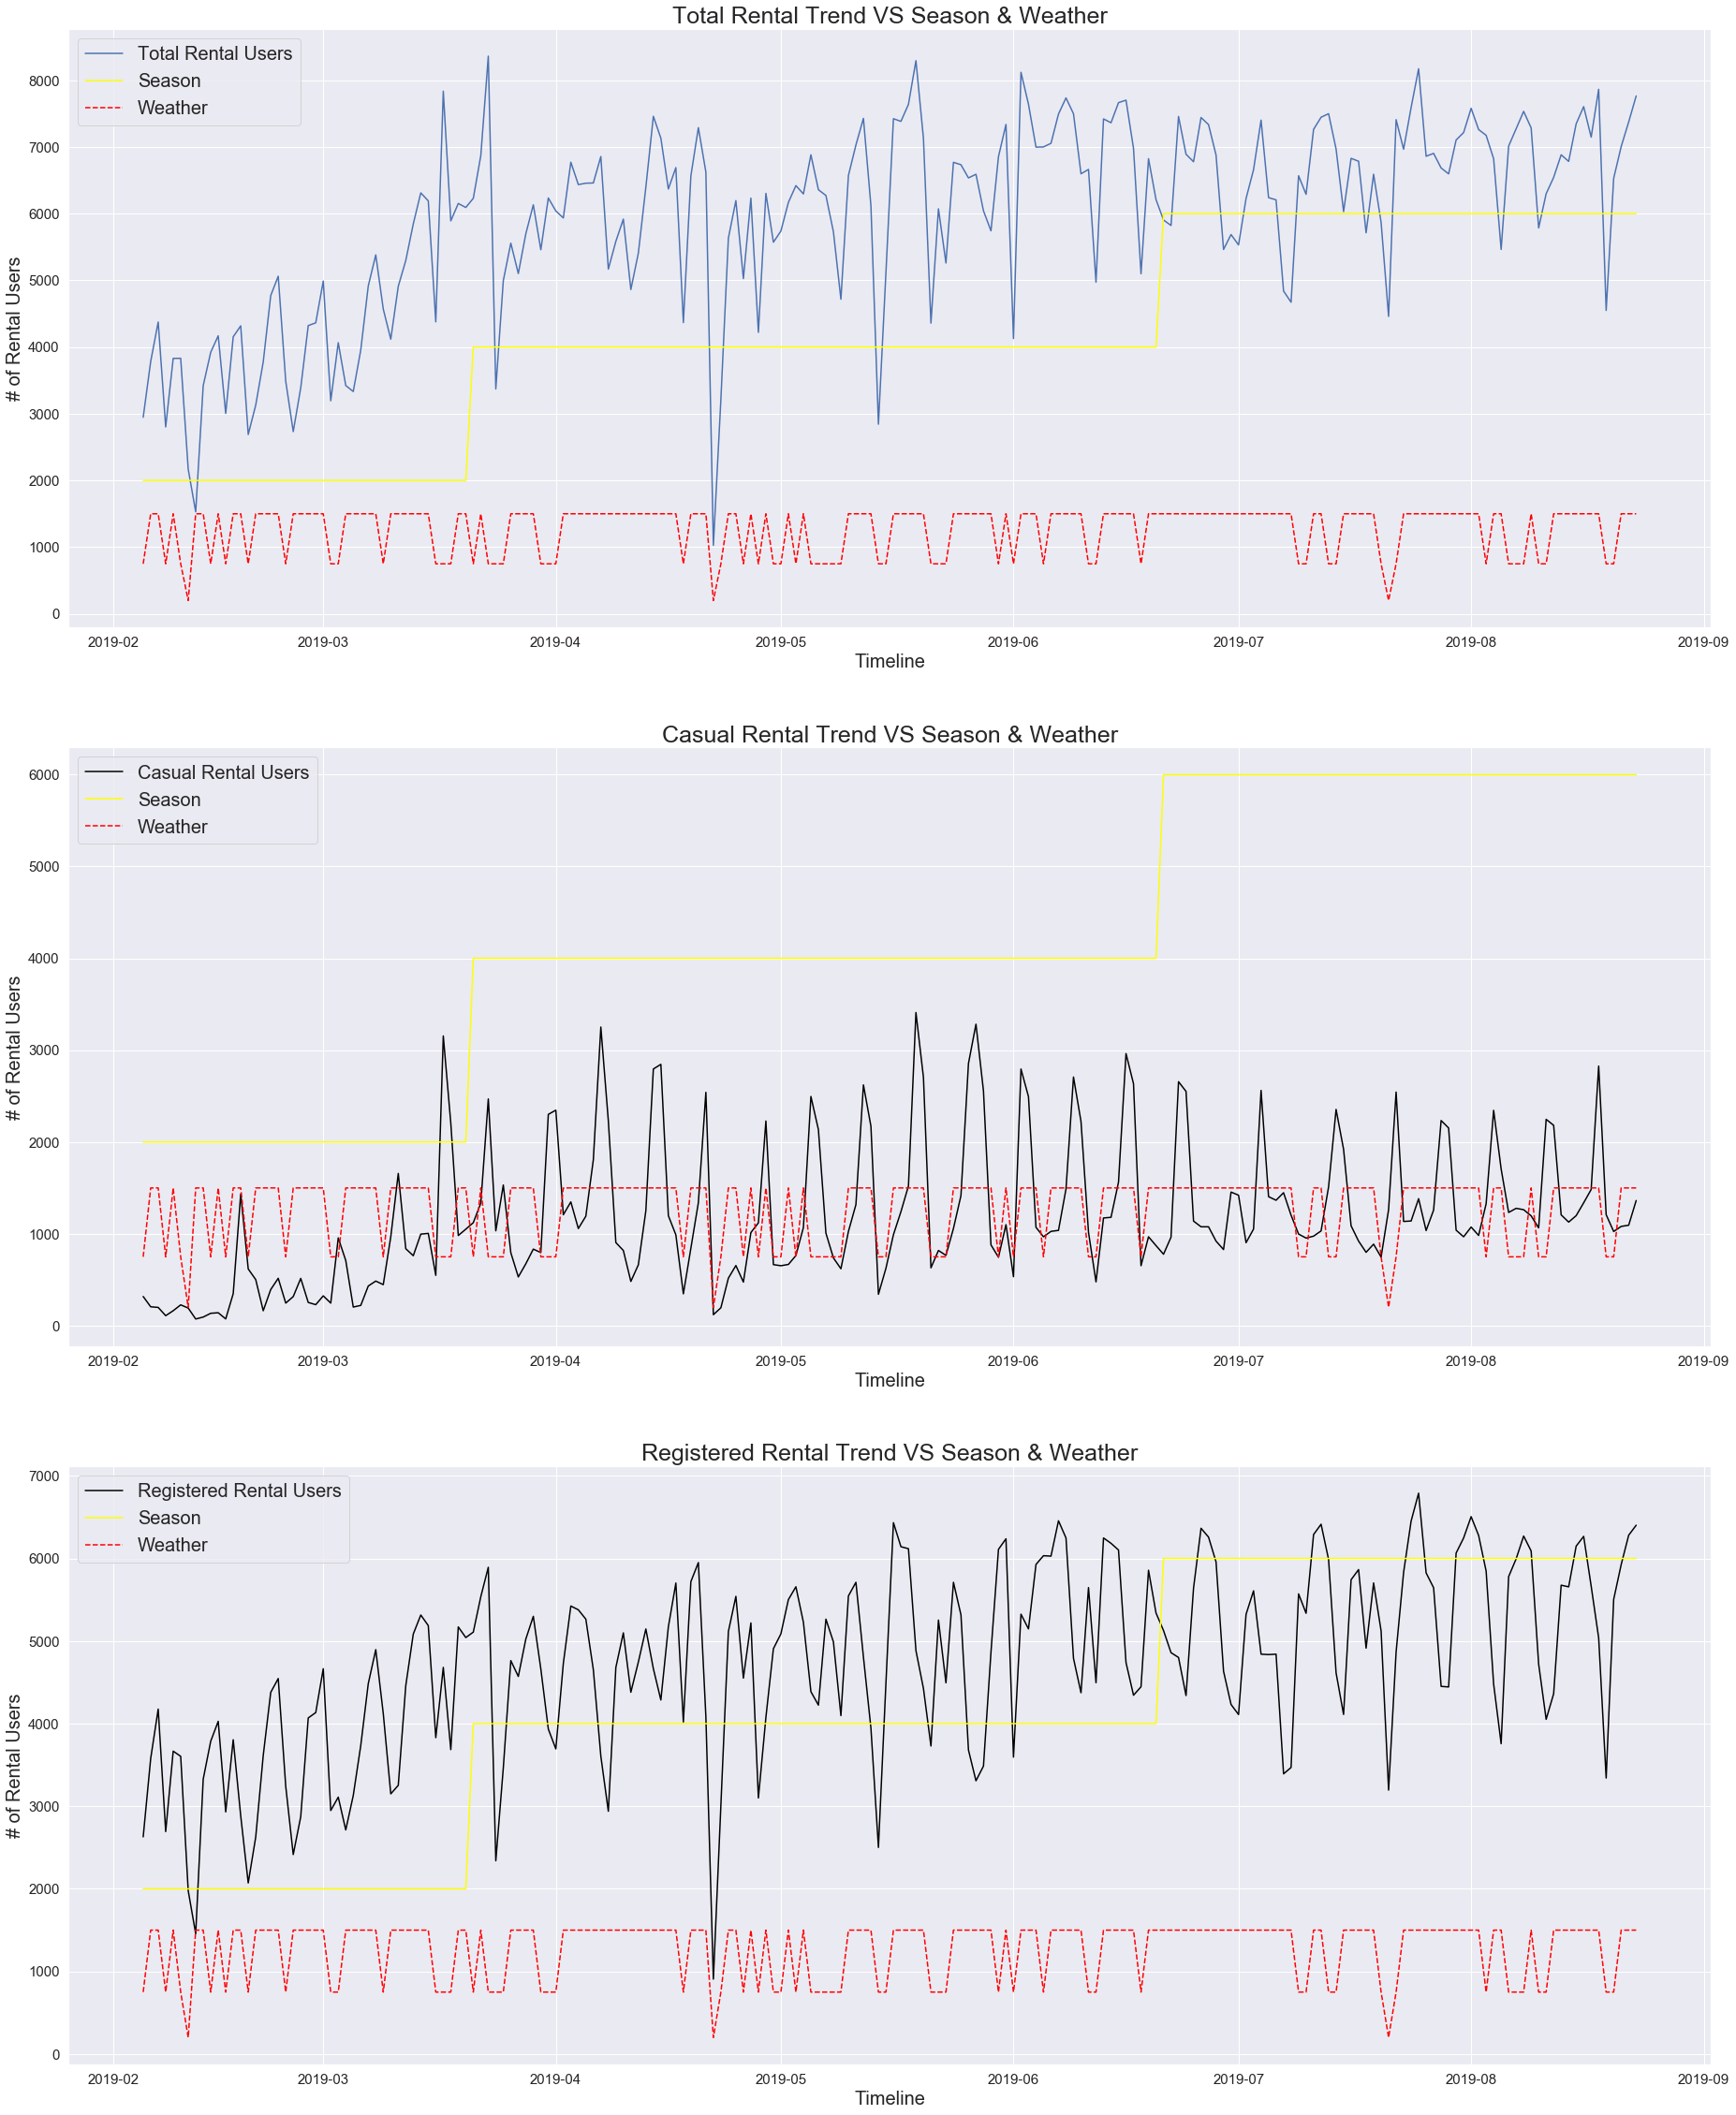

In [26]:
plt.figure(figsize = (28, 40))

plt.subplot(3,1,1)
plt.plot(rental['dteday'][400:600], rental['cnt'][400:600])
plt.plot(rental['dteday'][400:600],season_series[400:600], linestyle='solid', color='yellow')
plt.plot(rental['dteday'][400:600],weather_series[400:600], linestyle='dashed', color='red')
plt.title('Total Rental Trend VS Season & Weather', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Total Rental Users', 'Season', 'Weather'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(3,1,2)
plt.plot(rental['dteday'][400:600], rental['casual'][400:600], color = 'black')
plt.plot(rental['dteday'][400:600],season_series[400:600], linestyle='solid', color='yellow')
plt.plot(rental['dteday'][400:600],weather_series[400:600], linestyle='dashed', color='red')
plt.title('Casual Rental Trend VS Season & Weather', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Casual Rental Users', 'Season', 'Weather'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(3,1,3)
plt.plot(rental['dteday'][400:600], rental['registered'][400:600], color = 'black')
plt.plot(rental['dteday'][400:600],season_series[400:600], linestyle='solid', color='yellow')
plt.plot(rental['dteday'][400:600],weather_series[400:600], linestyle='dashed', color='red')
plt.title('Registered Rental Trend VS Season & Weather', size=25)
plt.xlabel('Timeline', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Registered Rental Users', 'Season', 'Weather'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

#### Number of users on day based
   - `Thursday`, `Friday`, `Saturday` and `Sunday` have high rentals
   - In this two years, there has been one holiday on `Thursday` and `Tuesday` and rentals have peaked as it was long holiday
   - Average ride on a given day is around `4000 - 4200 rides`

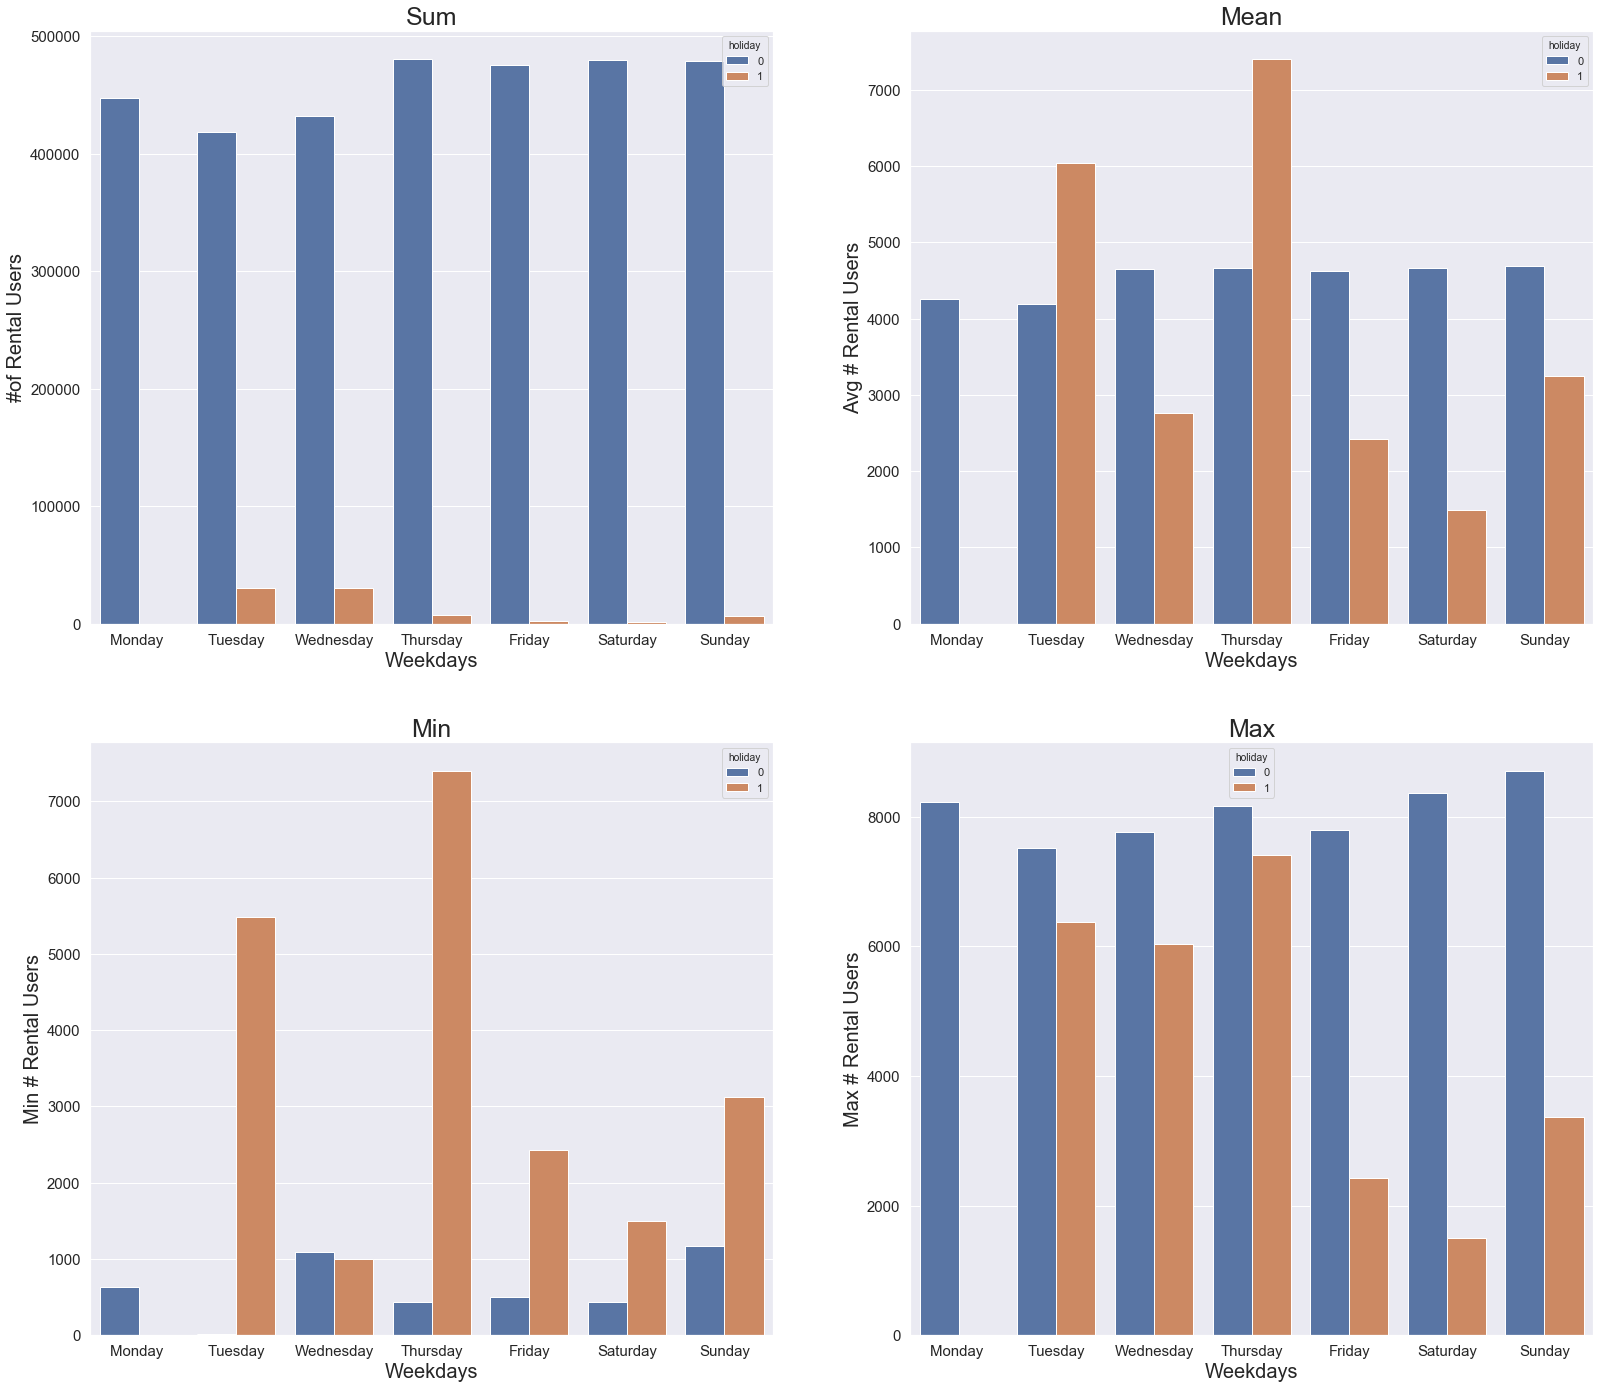

In [27]:
plt.figure(figsize = (24,24))

plt.subplot(2, 2, 1)
sns.barplot(x = 'weekday', y = 'cnt', data = rental, hue = 'holiday', estimator =sum, ci = None)
plt.title('Sum', size=25)
plt.xlabel('Weekdays', size=20)
plt.ylabel('#of Rental Users', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(2, 2, 2)
sns.barplot(x = 'weekday', y = 'cnt', data = rental, hue = 'holiday', ci = None)
plt.title('Mean', size=25)
plt.xlabel('Weekdays', size=20)
plt.ylabel('Avg # Rental Users', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(2, 2, 3)
sns.barplot(x = 'weekday', y = 'cnt', data = rental, hue = 'holiday', estimator =min, ci = None)
plt.title('Min', size=25)
plt.xlabel('Weekdays', size=20)
plt.ylabel('Min # Rental Users', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(2, 2, 4)
sns.barplot(x = 'weekday', y = 'cnt', data = rental, hue = 'holiday', estimator =max, ci = None)
plt.title('Max', size=25)
plt.xlabel('Weekdays', size=20)
plt.ylabel('Max # Rental Users', size=20)
plt.xticks(size=15)
plt.yticks(size=15)


plt.show()

### Data Preparation for Modelling

#### Adding dummies

In [28]:
#Weathersit has only 3 possible value as per data
rental_model = pd.get_dummies(rental, columns = ['season', 'mnth', 'weekday', 'weathersit'],drop_first = True)
rental_model

dteday  yr  holiday  workingday       temp     atemp      hum  \
instant                                                                     
1       2018-01-01   0        0           1  14.110847  18.18125  80.5833   
2       2018-01-02   0        0           1  14.902598  17.68695  69.6087   
3       2018-01-03   0        0           1   8.050924   9.47025  43.7273   
4       2018-01-04   0        0           1   8.200000  10.60610  59.0435   
5       2018-01-05   0        0           1   9.305237  11.46350  43.6957   
...            ...  ..      ...         ...        ...       ...      ...   
726     2019-12-27   1        0           1  10.420847  11.33210  65.2917   
727     2019-12-28   1        0           0  10.386653  12.75230  59.0000   
728     2019-12-29   1        0           0  10.386653  12.12000  75.2917   
729     2019-12-30   1        0           1  10.489153  11.58500  48.3333   
730     2019-12-31   1        0           1   8.849153  11.17435  57.7500   

         windspeed  casual  registered   cnt  weekend  ...  mnth_May  \
instant                                                ...             
1        10.749882     331         654   985        0  ...         0   
2        16.652113     131         670   801        0  ...         0   
3        16.636703     120        1229  1349        0  ...         0   
4        10.739832     108        1454  1562        0  ...         0   
5        12.522300      82        1518  1600        0  ...         0   
...            ...     ...         ...   ...      ...  ...       ...   
726      23.458911     247        1867  2114        0  ...         0   
727      10.416557     644        2451  3095        1  ...         0   
728       8.333661     159        1182  1341        1  ...         0   
729      23.500518     364        1432  1796        0  ...         0   
730      10.374682     439        2290  2729        0  ...         0   

         mnth_Nov  mnth_Oct  mnth_Sep  weekday_Monday   weekday_Saturday  \
instant                                                                    
1               0         0         0                1                 0   
2               0         0         0                0                 0   
3               0         0         0                0                 0   
4               0         0         0                0                 0   
5               0         0         0                0                 0   
...           ...       ...       ...              ...               ...   
726             0         0         0                0                 0   
727             0         0         0                0                 1   
728             0         0         0                0                 0   
729             0         0         0                1                 0   
730             0         0         0                0                 0   

         weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
instant                                                                         
1                     0                 0                0                  0   
2                     0                 0                1                  0   
3                     0                 0                0                  1   
4                     0                 1                0                  0   
5                     0                 0                0                  0   
...                 ...               ...              ...                ...   
726                   0                 0                0                  0   
727                   0                 0                0                  0   
728                   1                 0                0                  0   
729                   0                 0                0                  0   
730                   0                 0                1                  0   

         weathersit_Light Rain

In [29]:
#Dropping the unnecessary columns
#'casual', 'registered', 'dteday' 
# 'casual', 'registered' is being dropped as in real time we wont have this data to predict

rental_model.drop(['casual', 'registered', 'dteday'], axis = 1, inplace = True)
rental_model.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  \
instant                                                                     
1         0        0           1  14.110847  18.18125  80.5833  10.749882   
2         0        0           1  14.902598  17.68695  69.6087  16.652113   
3         0        0           1   8.050924   9.47025  43.7273  16.636703   
4         0        0           1   8.200000  10.60610  59.0435  10.739832   
5         0        0           1   9.305237  11.46350  43.6957  12.522300   

          cnt  weekend  season_spring  season_summer  season_winter  ...  \
instant                                                              ...   
1         985        0              1              0              0  ...   
2         801        0              1              0              0  ...   
3        1349        0              1              0              0  ...   
4        1562        0              1              0              0  ...   
5        1600        0              1              0              0  ...   

         mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  weekday_Monday   \
instant                                                            
1               0         0         0         0                1   
2               0         0         0         0                0   
3               0         0         0         0                0   
4               0         0         0         0                0   
5               0         0         0         0                0   

         weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
instant                                                                        
1                       0               0                 0                0   
2                       0               0                 0                1   
3                       0               0                 0                0   
4                       0               0                 1                0   
5                       0               0                 0                0   

         weekday_Wednesday  weathersit_Light Rain-Light Snow  \
instant                                                        
1                        0                                 0   
2                        0                                 0   
3                        1                                 0   
4                        0                                 0   
5                        0                                 0   

         weathersit_Mist-Cloudy   
instant                           
1                              1  
2                              1  
3                              0  
4                              0  
5                              0  

[5 rows x 31 columns]

In [30]:
#Dropping 'instant'
rental_model.reset_index(inplace=True)
rental_model.drop(['instant'], axis = 1, inplace = True)
rental_model

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           0  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           1  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     weekend  season_spring  season_summer  season_winter  ...  mnth_May  \
0          0              1              0              0  ...         0   
1          0              1              0              0  ...         0   
2          0              1              0              0  ...         0   
3          0              1              0              0  ...         0   
4          0              1              0              0  ...         0   
..       ...            ...            ...            ...  ...       ...   
725        0              1              0              0  ...         0   
726        1              1              0              0  ...         0   
727        1              1              0              0  ...         0   
728        0              1              0              0  ...         0   
729        0              1              0              0  ...         0   

     mnth_Nov  mnth_Oct  mnth_Sep  weekday_Monday   weekday_Saturday  \
0           0         0         0                1                 0   
1           0         0         0                0                 0   
2           0         0         0                0                 0   
3           0         0         0                0                 0   
4           0         0         0                0                 0   
..        ...       ...       ...              ...               ...   
725         0         0         0                0                 0   
726         0         0         0                0                 1   
727         0         0         0                0                 0   
728         0         0         0                1                 0   
729         0         0         0                0                 0   

     weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
0                 0                 0                0                  0   
1                 0                 0                1                  0   
2                 0                 0                0                  1   
3                 0                 1                0                  0   
4                 0                 0                0                  0   
..              ...               ...              ...                ...   
725               0                 0                0                  0   
726               0                 0                0                  0   
727               1                 0                0                  0   
728               0                 0                0                  0   
729               0                 0                1                  0   

     weathersit_Light Rain-Light Snow  weathersit_Mist-Cloudy   
0                                   0                        1  
1                                   0                        1  
2                                   0                        0  
3                                   0                        0  
4                           

#### Checking corr() for all parameters
   - `Season` - Spring(Jan, Feb, Mar) has significant negative corr with cnt
   - `June, July, August, Septemeber` has significant positive corr with cnt
   - `Monday, Tuesday, Wednesday` has non significant but negative corr with cnt

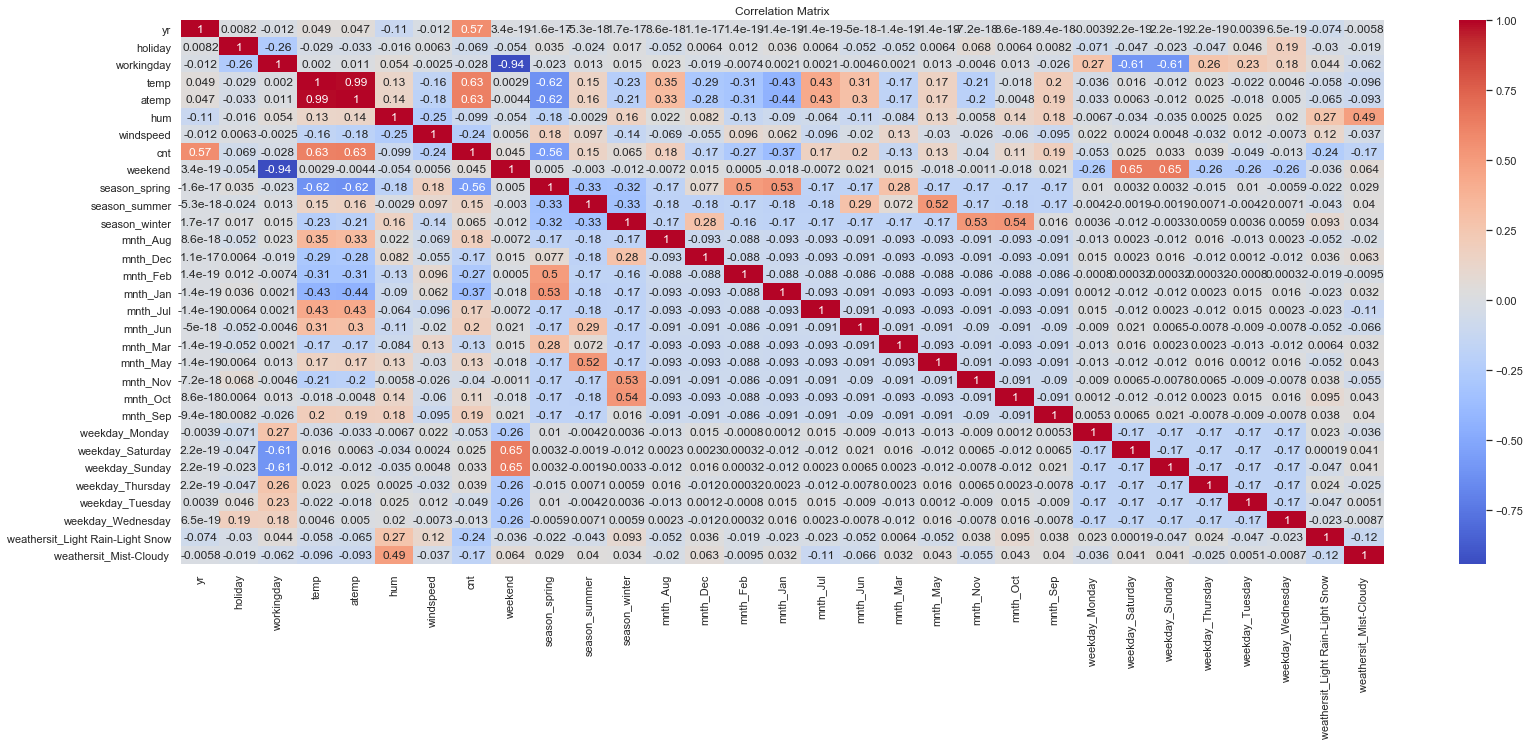

In [31]:
plt.figure(figsize = (24, 10))
sns.heatmap(rental_model.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Modelling - Basic with RFE

#### Importing the necessary libraries

In [32]:
#statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#sklearn
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Test - Train Split

In [33]:
#Split the train and test data
rental_train, rental_test = train_test_split(rental_model, train_size = 0.7, random_state = 100)
print(rental_train.shape)
print(rental_test.shape)

(510, 31)
(220, 31)


#### Normalized Scaling - MinMax Scalar

##### Training data

In [34]:
scaler = MinMaxScaler()

num_var = ['temp', 'atemp', 'hum','windspeed', 'cnt']
rental_train[num_var] = scaler.fit_transform(rental_train[num_var])

rental_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           0  0.345824  0.318819  0.751824   0.380981   

          cnt  weekend  season_spring  season_summer  season_winter  ...  \
576  0.827658        0              0              0              0  ...   
426  0.465255        1              1              0              0  ...   
728  0.204096        0              1              0              0  ...   
482  0.482973        1              0              1              0  ...   
111  0.191095        1              0              1              0  ...   

     mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  weekday_Monday   \
576         0         0         0         0                0   
426         0         0         0         0                0   
728         0         0         0         0                1   
482         0         0         0         0                0   
111         0         0         0         0                0   

     weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
576                 0               0                 0                0   
426                 0               1                 0                0   
728                 0               0                 0                0   
482                 0               1                 0                0   
111                 0               1                 0                0   

     weekday_Wednesday  weathersit_Light Rain-Light Snow  \
576                  1                                 0   
426                  0                                 0   
728                  0                                 0   
482                  0                                 0   
111                  0                                 0   

     weathersit_Mist-Cloudy   
576                        0  
426                        1  
728                        0  
482                        1  
111                        1  

[5 rows x 31 columns]

In [35]:
rental_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.453386    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt     weekend  season_spring  season_summer  \
count  510.000000  510.000000  510.000000     510.000000     510.000000   
mean     0.320883    0.513499    0.266667       0.243137       0.247059   
std      0.169803    0.224421    0.442651       0.429398       0.431725   
min      0.000000    0.000000    0.000000       0.000000       0.000000   
25%      0.199179    0.356420    0.000000       0.000000       0.000000   
50%      0.296763    0.518638    0.000000       0.000000       0.000000   
75%      0.414447    0.684710    1.000000       0.000000       0.000000   
max      1.000000    1.000000    1.000000       1.000000       1.000000   

       season_winter  ...    mnth_May    mnth_Nov    mnth_Oct    mnth_Sep  \
count     510.000000  ...  510.000000  510.000000  510.000000  510.000000   
mean        0.247059  ...    0.084314    0.086275    0.084314    0.080392   
std         0.431725  ...    0.278131    0.281045    0.278131    0.272166   
min         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
50%         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
75%         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
max         1.000000  ...    1.000000    1.000000    1.000000    1.000000   

       weekday_Monday   weekday_Saturday  weekday_Sunday  weekday_Thursday  \
count       510.000000        510.000000      510.000000        510.000000   
mean          0.154902          0.129412        0.137255          0.143137   
std           0.362166          0.335985        0.344454          0.350557   
min           0.000000          0.000000        0.000000          0.000000   
25%           0.000000          0.000000        0.000000          0.000000   
50%           0.000000          0.000000        0.000000          0.000000   
75%           0.000000          0.000000        0.000000          0.000000   
max           1.000000          1.000000        1.000000          1.000000   

       weekday_Tuesday  weekday_Wednesday  weathersit_Light Rain-Light Snow  \
count       510.000000         510.000000                        510.000000   
mean          0.152941           0.135294                          0.029412   
std           0.360284           0.342373                          0.169124   
min           0.000000           0.000000                          0.000000   
25%           0.000000           0.000000                          0.000000   
50%           0.000000           0.000000                          0.000000   
75%           0.000000           0.000000                          0.000000   
max           1.000000           1.000000                          1.000000   

       weathersit_Mist-Cloudy   
count               510.000000  
mean                  0.345098  
std                   0.475867  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   1.000000  
max                   1.000000  

[8 rows x 31 columns]

##### Test data

In [36]:
rental_test[num_var] = scaler.transform(rental_test[num_var])
rental_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           0  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           0  0.817246  0.741471  0.314298   0.537414   

          cnt  weekend  season_spring  season_summer  season_winter  ...  \
184  0.692706        0              0              0              0  ...   
535  0.712034        0              0              1              0  ...   
299  0.303382        1              0              0              1  ...   
221  0.547400        0              0              0              0  ...   
152  0.569029        1              0              1              0  ...   

     mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  weekday_Monday   \
184         0         0         0         0                0   
535         0         0         0         0                0   
299         0         0         1         0                0   
221         0         0         0         0                0   
152         0         0         0         0                0   

     weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
184                 0               0                 0                0   
535                 0               0                 1                0   
299                 1               0                 0                0   
221                 0               0                 0                0   
152                 1               0                 0                0   

     weekday_Wednesday  weathersit_Light Rain-Light Snow  \
184                  1                                 0   
535                  0                                 0   
299                  0                                 0   
221                  0                                 0   
152                  0                                 0   

     weathersit_Mist-Cloudy   
184                        1  
535                        0  
299                        1  
221                        0  
152                        0  

[5 rows x 31 columns]

In [37]:
rental_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.480828    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt     weekend  season_spring  season_summer  \
count  220.000000  220.000000  220.000000     220.000000     220.000000   
mean     0.313293    0.522154    0.327273       0.254545       0.263636   
std      0.159584    0.219163    0.470288       0.436599       0.441609   
min     -0.042808    0.048205    0.000000       0.000000       0.000000   
25%      0.198843    0.378595    0.000000       0.000000       0.000000   
50%      0.300126    0.524678    0.000000       0.000000       0.000000   
75%      0.402718    0.677750    1.000000       1.000000       1.000000   
max      0.807474    0.963300    1.000000       1.000000       1.000000   

       season_winter  ...    mnth_May    mnth_Nov    mnth_Oct    mnth_Sep  \
count     220.000000  ...  220.000000  220.000000  220.000000  220.000000   
mean        0.236364  ...    0.086364    0.072727    0.086364    0.086364   
std         0.425817  ...    0.281541    0.260281    0.281541    0.281541   
min         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
25%         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
50%         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
75%         0.000000  ...    0.000000    0.000000    0.000000    0.000000   
max         1.000000  ...    1.000000    1.000000    1.000000    1.000000   

       weekday_Monday   weekday_Saturday  weekday_Sunday  weekday_Thursday  \
count       220.000000        220.000000      220.000000        220.000000   
mean          0.118182          0.172727        0.154545          0.140909   
std           0.323559          0.378873        0.362295          0.348721   
min           0.000000          0.000000        0.000000          0.000000   
25%           0.000000          0.000000        0.000000          0.000000   
50%           0.000000          0.000000        0.000000          0.000000   
75%           0.000000          0.000000        0.000000          0.000000   
max           1.000000          1.000000        1.000000          1.000000   

       weekday_Tuesday  weekday_Wednesday  weathersit_Light Rain-Light Snow  \
count       220.000000         220.000000                        220.000000   
mean          0.122727           0.159091                          0.027273   
std           0.328872           0.366595                          0.163248   
min           0.000000           0.000000                          0.000000   
25%           0.000000           0.000000                          0.000000   
50%           0.000000           0.000000                          0.000000   
75%           0.000000           0.000000                          0.000000   
max           1.000000           1.000000                          1.000000   

       weathersit_Mist-Cloudy   
count               220.000000  
mean                  0.318182  
std                   0.466833  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   1.000000  
max                   1.000000  

[8 rows x 31 columns]

#### Feature Selection with RFE

In [38]:
y_train = rental_train.pop('cnt')
X_train = rental_train

In [39]:
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

In [40]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', False, 5),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday ', False, 7),
 ('weekday_Saturday', False, 10),
 ('weekday_Sunday', False, 11),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Rain-Light Snow', True, 1),
 ('weathersit_Mist-Cloudy ', True, 1)]

In [42]:
#Storing the selected columns in col
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Rain-Light Snow',
       'weathersit_Mist-Cloudy '],
      dtype='object')

### Advanced Modelling

#### Building model using statsmodel

In [43]:
X_train_rfe = X_train[col]

#Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
#OLS
rental_sm_1 = sm.OLS(y_train, X_train_rfe).fit() 
print(rental_sm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.15e-189
Time:                        21:57:46   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [45]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF Factor'] = round(vif['VIF Factor'], 2)
vif["features"] = X_train_rfe.columns
vif

VIF Factor                          features
0        82.52                             const
1         1.04                                yr
2         1.03                           holiday
3         4.42                              temp
4         1.92                               hum
5         1.21                         windspeed
6         5.27                     season_spring
7         2.77                     season_summer
8         3.83                     season_winter
9         1.50                          mnth_Dec
10        1.68                          mnth_Jan
11        1.49                          mnth_Jul
12        1.77                          mnth_Nov
13        1.34                          mnth_Sep
14        1.26  weathersit_Light Rain-Light Snow
15        1.57           weathersit_Mist-Cloudy

#### Dropping the 'season_spring' variable due to high multi-collinearity

In [46]:
X_train_rfe.pop('season_spring')

#OLS
rental_sm_2 = sm.OLS(y_train, X_train_rfe).fit() 
print(rental_sm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.50e-188
Time:                        21:57:46   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [47]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF Factor'] = round(vif['VIF Factor'], 2)
vif["features"] = X_train_rfe.columns
vif

VIF Factor                          features
0        51.76                             const
1         1.03                                yr
2         1.03                           holiday
3         2.32                              temp
4         1.90                               hum
5         1.20                         windspeed
6         1.44                     season_summer
7         2.09                     season_winter
8         1.48                          mnth_Dec
9         1.67                          mnth_Jan
10        1.43                          mnth_Jul
11        1.71                          mnth_Nov
12        1.21                          mnth_Sep
13        1.25  weathersit_Light Rain-Light Snow
14        1.55           weathersit_Mist-Cloudy

#### Dropping the `mnth_Nov` as not significant

In [48]:
X_train_rfe.pop('mnth_Nov')

#OLS
rental_sm_3 = sm.OLS(y_train, X_train_rfe).fit() 
print(rental_sm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.91e-189
Time:                        21:57:47   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [49]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF Factor'] = round(vif['VIF Factor'], 2)
vif["features"] = X_train_rfe.columns
vif

VIF Factor                          features
0        50.81                             const
1         1.03                                yr
2         1.02                           holiday
3         2.25                              temp
4         1.90                               hum
5         1.20                         windspeed
6         1.44                     season_summer
7         1.55                     season_winter
8         1.26                          mnth_Dec
9         1.63                          mnth_Jan
10        1.43                          mnth_Jul
11        1.20                          mnth_Sep
12        1.25  weathersit_Light Rain-Light Snow
13        1.55           weathersit_Mist-Cloudy

#### Dropping the `mnth_Dec` as not significant

In [50]:
X_train_rfe.pop('mnth_Dec')

#OLS
rental_sm_4 = sm.OLS(y_train, X_train_rfe).fit() 
print(rental_sm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.04e-189
Time:                        21:57:47   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [51]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF Factor'] = round(vif['VIF Factor'], 2)
vif["features"] = X_train_rfe.columns
vif

VIF Factor                          features
0        49.59                             const
1         1.03                                yr
2         1.02                           holiday
3         2.06                              temp
4         1.88                               hum
5         1.19                         windspeed
6         1.41                     season_summer
7         1.53                     season_winter
8         1.55                          mnth_Jan
9         1.43                          mnth_Jul
10        1.19                          mnth_Sep
11        1.24  weathersit_Light Rain-Light Snow
12        1.55           weathersit_Mist-Cloudy

#### Dropping the `mnth_Jan` as not significant

In [52]:
X_train_rfe.pop('mnth_Jan')

#OLS
rental_sm_5 = sm.OLS(y_train, X_train_rfe).fit() 
print(rental_sm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.89e-190
Time:                        21:57:48   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [53]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF Factor'] = round(vif['VIF Factor'], 2)
vif["features"] = X_train_rfe.columns
vif

VIF Factor                          features
0        44.97                             const
1         1.03                                yr
2         1.02                           holiday
3         1.60                              temp
4         1.87                               hum
5         1.18                         windspeed
6         1.33                     season_summer
7         1.29                     season_winter
8         1.43                          mnth_Jul
9         1.19                          mnth_Sep
10        1.24  weathersit_Light Rain-Light Snow
11        1.55           weathersit_Mist-Cloudy

#### Dropping the `mnth_Jul` as not significant

In [54]:
X_train_rfe.pop('mnth_Jul')

#OLS
rental_sm_6 = sm.OLS(y_train, X_train_rfe).fit() 
print(rental_sm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.32e-189
Time:                        21:57:49   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [55]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF Factor'] = round(vif['VIF Factor'], 2)
vif["features"] = X_train_rfe.columns
vif

VIF Factor                          features
0        44.97                             const
1         1.03                                yr
2         1.02                           holiday
3         1.27                              temp
4         1.86                               hum
5         1.18                         windspeed
6         1.19                     season_summer
7         1.25                     season_winter
8         1.11                          mnth_Sep
9         1.23  weathersit_Light Rain-Light Snow
10        1.55           weathersit_Mist-Cloudy

### Evaluation - Model 6
   - R2 score - `(0.80)` [Good fit model]

#### Residual Analysis

In [56]:
#Predicting the 'y' with the built model
y_train_pred = rental_sm_6.predict(X_train_rfe)
y_train_pred

576    0.743400
426    0.497064
728    0.383478
482    0.597375
111    0.260590
         ...   
578    0.793824
53     0.244403
350    0.274373
79     0.298021
520    0.659738
Length: 510, dtype: float64

In [57]:
y_train_pred.shape

(510,)

In [58]:
#Reshaping the predicted
y_train_pred = np.array(y_train_pred).reshape(-1,1)

In [59]:
y_train_pred.shape

(510, 1)

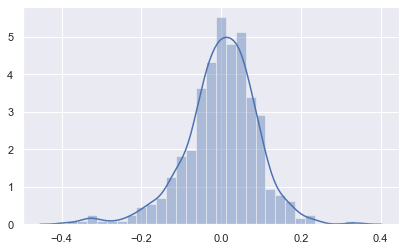

In [60]:
#Plotting the residual
res = y_train - y_train_pred
sns.distplot(res)

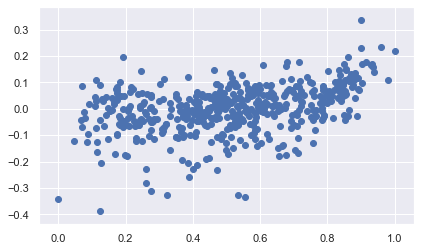

In [61]:
#Look for pattern with X_train and residue
plt.scatter(y_train, res)
plt.show()

**Observation** -  Distribution of error is normal distribution and the mean is around zero and visible pattern in residue. The model is good to go

#### Predicting & Evaluating the Model against Test data

In [62]:
#Matching the columns of the final model
col_model = list(X_train_rfe.columns)
col_model.remove('const')
col_model

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_Sep',
 'weathersit_Light Rain-Light Snow',
 'weathersit_Mist-Cloudy ']

In [63]:
X_test = rental_test[col_model]
X_test.head()

yr  holiday      temp       hum  windspeed  season_summer  season_winter  \
184   0        1  0.831783  0.657364   0.084219              0              0   
535   1        0  0.901354  0.610133   0.153728              1              0   
299   0        0  0.511964  0.837699   0.334206              0              1   
221   0        0  0.881625  0.437098   0.339570              0              0   
152   0        0  0.817246  0.314298   0.537414              1              0   

     mnth_Sep  weathersit_Light Rain-Light Snow  weathersit_Mist-Cloudy   
184         0                                 0                        1  
535         0                                 0                        0  
299         0                                 0                        1  
221         0                                 0                        0  
152         0                                 0                        0

In [64]:
#Adding a constant
X_test_sm = sm.add_constant(X_test)

In [65]:
y_test = rental_test['cnt']

##### Predicting y_test

In [66]:
y_test_pred = rental_sm_6.predict(X_test_sm)

In [67]:
#Reshape to (-1,1)
y_test_pred = np.array(y_test_pred).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [68]:
y_test_pred.shape

(220, 1)

##### Evaluating the model

In [69]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.8051741066002438

**Observation** - The trained model is able to predict 80% of data in the test set. The Finalized model is a very good model

(array([-0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 9 Text yticklabel objects>)

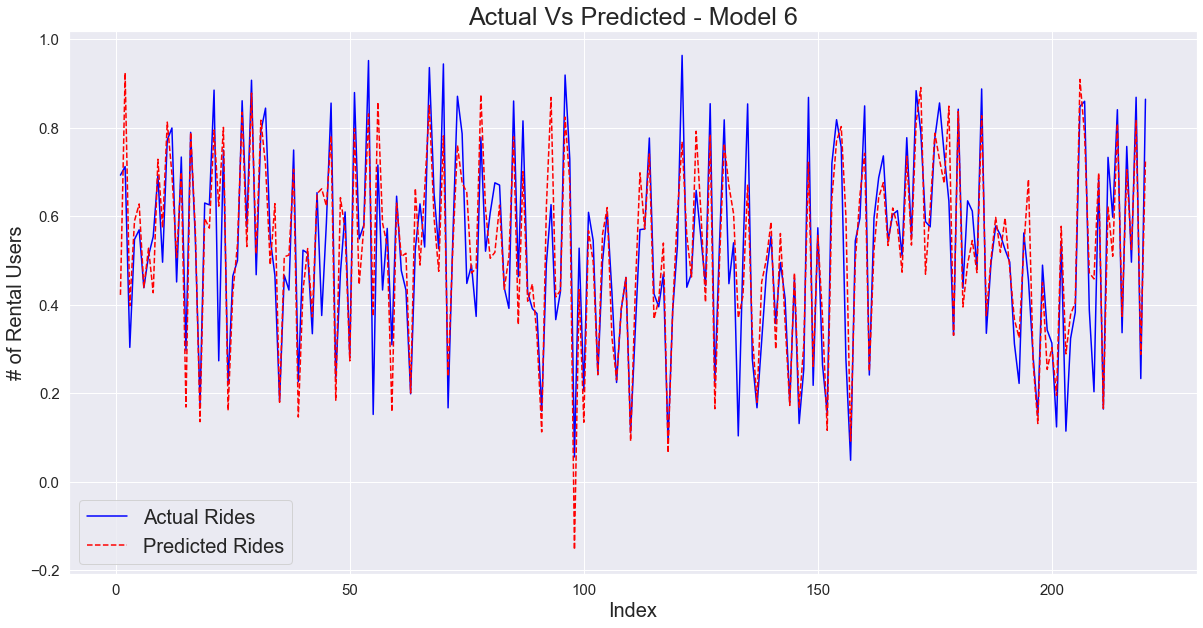

In [70]:
#Actual vs Predicted 
c = [i for i in range(1,y_test.shape[0]+1,1)]
plt.figure(figsize=(18,10))

plt.plot(c,y_test, color="blue", linestyle="solid")
plt.plot(c,y_test_pred, color="red", linestyle='dashed')
plt.title('Actual Vs Predicted - Model 6', size=25)
plt.xlabel('Index', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Actual Rides', 'Predicted Rides'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

**Observation** - Model is able to indentify the changes(increase/decrease) but facing challenges in cases of extreme values. Observation of a negative value is not ok

### Evaluation - Model 4

   - R2 score - `0.62` [Not ok] 

#### Residual Analysis

In [71]:
#Matching the columns of the model 4
col_model = list(X_train_rfe.columns)
col_model.remove('const')
col_model.extend(['mnth_Jan', 'mnth_Jul'])
col_model

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_Sep',
 'weathersit_Light Rain-Light Snow',
 'weathersit_Mist-Cloudy ',
 'mnth_Jan',
 'mnth_Jul']

In [72]:
X_train_rfe_4 = rental_train[col_model]
X_train_rfe_4 = sm.add_constant(X_train_rfe_4)

In [73]:
#Predicting the 'y' with the built model
y_train_pred = rental_sm_4.predict(X_train_rfe_4)
y_train_pred

576    0.708763
426    0.657440
728    0.396186
482    0.743531
111    0.404632
         ...   
578    0.810287
53     0.261501
350    0.418997
79     0.440975
520    0.804426
Length: 510, dtype: float64

In [74]:
y_train_pred.shape

(510,)

In [75]:
#Reshaping the predicted
y_train_pred = np.array(y_train_pred).reshape(-1,1)

In [76]:
y_train_pred.shape

(510, 1)

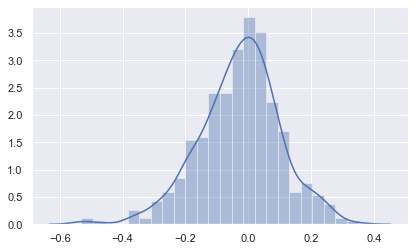

In [77]:
#Plotting the residual
res = y_train - y_train_pred
sns.distplot(res)

**Observation** -  Distribution of error is normal distribution and the mean is around zero. The model is good to go

#### Predicting & Evaluating the Model against Test data

In [78]:
X_test = rental_test[col_model]
X_test.head()

yr  holiday      temp       hum  windspeed  season_summer  season_winter  \
184   0        1  0.831783  0.657364   0.084219              0              0   
535   1        0  0.901354  0.610133   0.153728              1              0   
299   0        0  0.511964  0.837699   0.334206              0              1   
221   0        0  0.881625  0.437098   0.339570              0              0   
152   0        0  0.817246  0.314298   0.537414              1              0   

     mnth_Sep  weathersit_Light Rain-Light Snow  weathersit_Mist-Cloudy   \
184         0                                 0                        1   
535         0                                 0                        0   
299         0                                 0                        1   
221         0                                 0                        0   
152         0                                 0                        0   

     mnth_Jan  mnth_Jul  
184         0         1  
535         0         0  
299         0         0  
221         0         0  
152         0         0

In [79]:
#Adding a constant
X_test_sm = sm.add_constant(X_test)

In [80]:
y_test = rental_test['cnt']

##### Predicting y_test

In [81]:
y_test_pred = rental_sm_4.predict(X_test_sm)

In [82]:
#Reshape to (-1,1)
y_test_pred = np.array(y_test_pred).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [83]:
y_test_pred.shape

(220, 1)

##### Evaluating the model

In [84]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.6219911613480106

**Observation** - The trained model is able to predict 62% of data in the test set. Difference in R2 is greater than 5 and the model 4 is not ok

(array([-0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 9 Text yticklabel objects>)

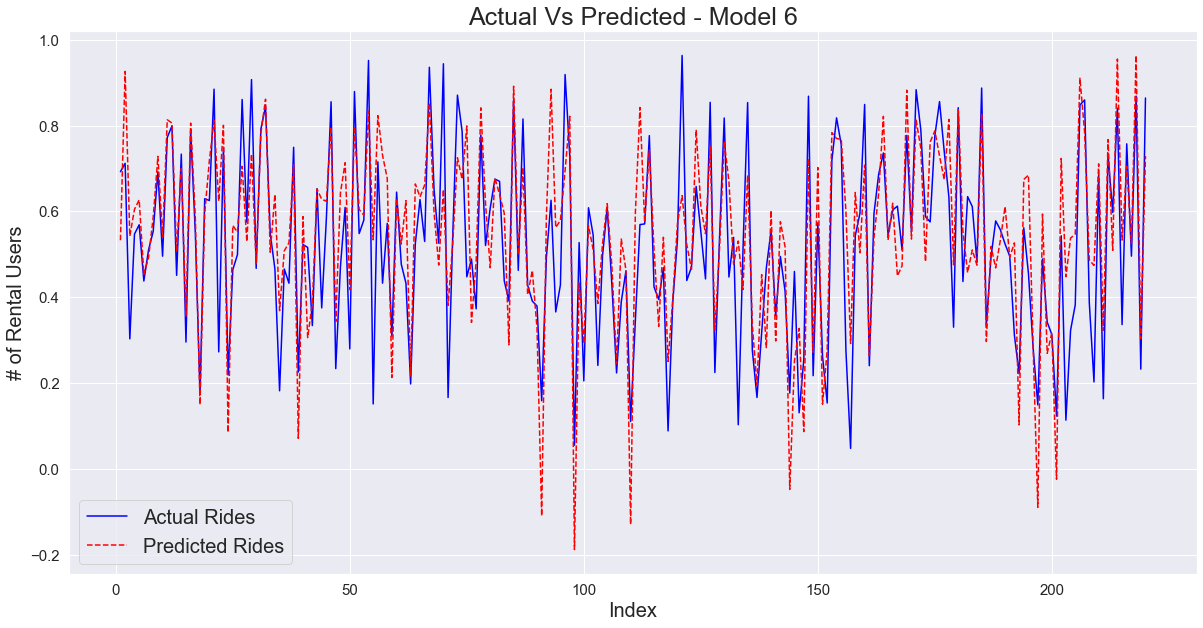

In [85]:
#Actual vs Predicted 
c = [i for i in range(1,y_test.shape[0]+1,1)]
plt.figure(figsize=(18,10))

plt.plot(c,y_test, color="blue", linestyle="solid")
plt.plot(c,y_test_pred, color="red", linestyle='dashed')
plt.title('Actual Vs Predicted - Model 6', size=25)
plt.xlabel('Index', size=20)
plt.ylabel('# of Rental Users', size=20)
plt.legend(['Actual Rides', 'Predicted Rides'], prop={'size': 20})
plt.xticks(size=15)
plt.yticks(size=15)

### Conclusion

The variables with significance are 
   - **`yr`**
   - **`holiday`**
   - **`temp`**
   - **`hum`**
   - **`windspeed`**
   - **`season_summer`**
   - **`season_winter`**
   - **`mnth_Sep`**
   - **`weathersit_Light Rain-Light Snow`**
   - **`weathersit_Mist-Cloudy`**
   
   
  $$ cnt = 0.2261 + (0.2289 X \yr) - (0.0975 X  \ \holiday) + (0.5708 X \temp) -  (0.1756 X \hum) - (0.1870 X \windspeed) + (0.0907 X \season \ \summer) + (0.1391 X \season \ \winter) + (0.1069 X \ \mnth \ \Sep) -  (0.2353 X \Light \ \rain \ \Light \ \snow) - (0.0503 X \ \Mist \ \Cloudy) $$